# Projet 2 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

## Analyse des données

## Lecture du Dataset

In [2]:
# Le dataset utilise des séparateur de type: tabulation
df = pd.read_csv("products_full.csv", sep="\t", low_memory=False)

In [3]:
#df.info()
#df.describe()
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Repérage des valeurs pertinentes

In [4]:
list(df.columns)

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

In [5]:
# Le projet consiste à ....
list_columns_names_to_keep = ['nutrition_grade_fr', 'additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'calcium_100g', 'iron_100g']
df_columns_keep = df[list_columns_names_to_keep]
df_columns_keep.head()

,nutrition_grade_fr,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,calcium_100g,iron_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,d,0.0,0.0,0.0,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,0.000,0.00129
2,b,0.0,0.0,0.0,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.071,0.00129
3,d,0.0,0.0,0.0,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,0.143,0.00514
4,NaN,0.0,0.0,0.0,1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN


### Valeurs manquantes

nutrition_grade_fr                          99562
additives_n                                 71833
ingredients_from_palm_oil_n                 71833
ingredients_that_may_be_from_palm_oil_n     71833
energy_100g                                 59659
fat_100g                                    76881
saturated-fat_100g                          91218
carbohydrates_100g                          77184
sugars_100g                                 75801
fiber_100g                                 119886
proteins_100g                               60850
salt_100g                                   65262
sodium_100g                                 65309
calcium_100g                               179722
iron_100g                                  180310
dtype: int64


<Axes: >

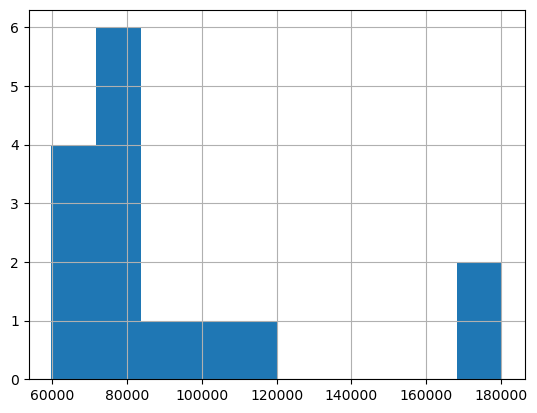

In [6]:
# Liste des colonnes qui contiennent des valeurs nulles
list_columns_with_null_values = []
for col in df_columns_keep.columns:
    if df_columns_keep[col].isnull().sum() > 0:
        list_columns_with_null_values.append(col)

# Nous observons le nombre de valeurs nulles par variables        
pd.set_option('display.max_rows', None)
print(df_columns_keep[list_columns_with_null_values].isnull().sum())
df_columns_keep[list_columns_with_null_values].isnull().sum().hist()

### Variables avec valeurs manquantes ( > 50 %)

In [7]:
# Liste des colonnes qui contiennent plus de 50% de valeurs nulles
list_columns_with_too_much_null_values = []

for col in list_columns_with_null_values :
    if (df_columns_keep[col].isnull().sum() / len(df.index)) * 100 > 50 :
        list_columns_with_too_much_null_values.append(col)
        #print(col)

print("Variable(s) contenant plus de 50% de valeurs manquantes:")
print(list_columns_with_too_much_null_values)

Variable(s) contenant plus de 50% de valeurs manquantes:
['calcium_100g', 'iron_100g']


<Axes: >

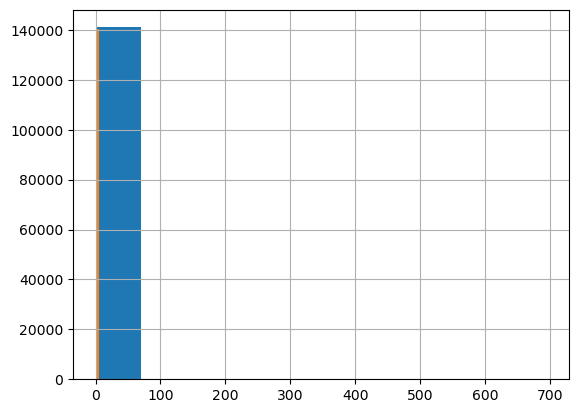

In [8]:
# Observons-les
df_columns_keep['calcium_100g'].hist()
df_columns_keep['iron_100g'].hist()

In [9]:
#Suppression des variables avec > 50% de valeurs manquantes
df_columns_keep = df_columns_keep.drop(columns=['calcium_100g', 'iron_100g'])

## Nettoyage des données

### Traitement des valeurs aberrantes

#### Dans un premier temps, car certaines valeurs manquantes seront traitées par la moyenne/médiane.
#### Il faut donc traiter les valeurs aberrantes au préalable pour ne pas introduire un biais de données.

array([[<Axes: title={'center': 'additives_n'}>,
        <Axes: title={'center': 'ingredients_from_palm_oil_n'}>,
        <Axes: title={'center': 'ingredients_that_may_be_from_palm_oil_n'}>],
       [<Axes: title={'center': 'energy_100g'}>,
        <Axes: title={'center': 'fat_100g'}>,
        <Axes: title={'center': 'saturated-fat_100g'}>],
       [<Axes: title={'center': 'carbohydrates_100g'}>,
        <Axes: title={'center': 'sugars_100g'}>,
        <Axes: title={'center': 'fiber_100g'}>],
       [<Axes: title={'center': 'proteins_100g'}>,
        <Axes: title={'center': 'salt_100g'}>,
        <Axes: title={'center': 'sodium_100g'}>]], dtype=object)

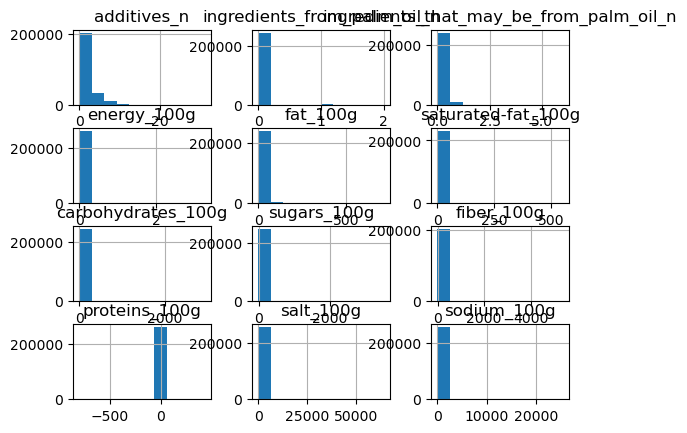

In [10]:
df_columns_keep.hist()

# TODO: Comment gerer la longueur du label de la variable ?
# TODO: Que puis-je faire de plus pour traiter les valeurs aberrantes ?
# On note que pour certaines valeurs les données tendent plus vers un axe qu'un autre, elles sont surrepresentées
# Je décide de ne pas les traiter par la médiane mais par la moyenne ('sodium_100g', 'proteins_100g', 'salt_100g')

In [17]:
# Je crée des listes pour les différentes méthodes de traitement que je vais appliquer
columns_to_treat_by_delete = ['nutrition_grade_fr']
columns_to_treat_by_mean = ['sodium_100g', 'proteins_100g', 'salt_100g']
columns_to_treat_by_median = ['additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g']
columns_to_treat_by_iterative_imputer = ['sugars_100g', 'fiber_100g']

### Traitement des valeurs manquantes

#### Méthode 1 : Suppression (pour la variable: nutrition_grade_fr)

In [18]:
# En effet pour la variable pertinente nutrition_grade_fr, qui joue un rôle important, il est préférable de supprimer complètement
# les lignes avec cette valeur manquante, car inutilisables

df_columns_keep = df_columns_keep[~df_columns_keep['nutrition_grade_fr'].isnull()]
df_columns_keep.head()
# On a bien que les valeurs remplies (pour nutrition_grade_fr)

,nutrition_grade_fr,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
1,d,0.0,0.0,0.0,2243.0,28.57,28.57,64.29,17.86,7.1,3.57,0.00000,0.000
2,b,0.0,0.0,0.0,1941.0,17.86,0.00,60.71,3.57,7.1,17.86,0.63500,0.250
3,d,0.0,0.0,0.0,2540.0,57.14,5.36,17.86,15.62,9.4,17.86,1.22428,0.482
7,c,2.0,0.0,0.0,1833.0,18.75,4.69,57.81,2.38,9.5,14.06,0.13970,0.055
12,d,1.0,0.0,0.0,2230.0,36.67,5.00,36.67,33.33,4.4,16.67,1.60782,0.633


#### Méthode 2 : Par la moyenne
Pour les données continuous dont le type est float64

Il y a désormais : 0 valeurs manquantes pour sodium_100g
Il y a désormais : 0 valeurs manquantes pour proteins_100g
Il y a désormais : 0 valeurs manquantes pour salt_100g


array([[<Axes: title={'center': 'sodium_100g'}>,
        <Axes: title={'center': 'proteins_100g'}>],
       [<Axes: title={'center': 'salt_100g'}>, <Axes: >]], dtype=object)

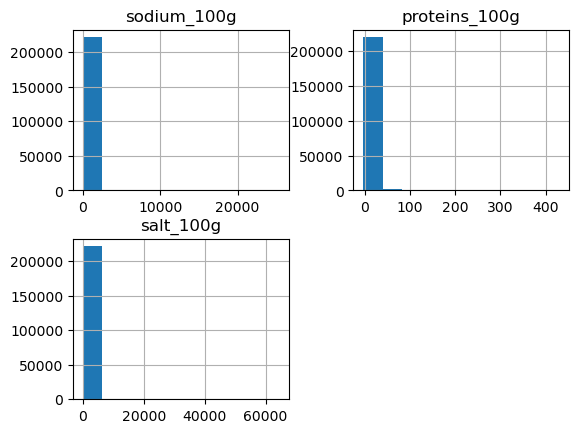

In [19]:
for col in columns_to_treat_by_mean:
    if df_columns_keep[col].dtypes == 'float64':
        df_columns_keep[col] = df_columns_keep[col].fillna(df_columns_keep[col].mean())
        print("Il y a désormais : " + str(df_columns_keep[col].isnull().sum()) + " valeurs manquantes pour " +col)
df_columns_keep[columns_to_treat_by_mean].hist()

##### Méthode 3 : La valeur médiane

Il y a désormais : 0 valeurs manquantes pour additives_n
Il y a désormais : 0 valeurs manquantes pour ingredients_from_palm_oil_n
Il y a désormais : 0 valeurs manquantes pour ingredients_that_may_be_from_palm_oil_n
Il y a désormais : 0 valeurs manquantes pour energy_100g
Il y a désormais : 0 valeurs manquantes pour fat_100g
Il y a désormais : 0 valeurs manquantes pour saturated-fat_100g
Il y a désormais : 0 valeurs manquantes pour carbohydrates_100g


array([[<Axes: title={'center': 'additives_n'}>,
        <Axes: title={'center': 'ingredients_from_palm_oil_n'}>,
        <Axes: title={'center': 'ingredients_that_may_be_from_palm_oil_n'}>],
       [<Axes: title={'center': 'energy_100g'}>,
        <Axes: title={'center': 'fat_100g'}>,
        <Axes: title={'center': 'saturated-fat_100g'}>],
       [<Axes: title={'center': 'carbohydrates_100g'}>, <Axes: >,
        <Axes: >]], dtype=object)

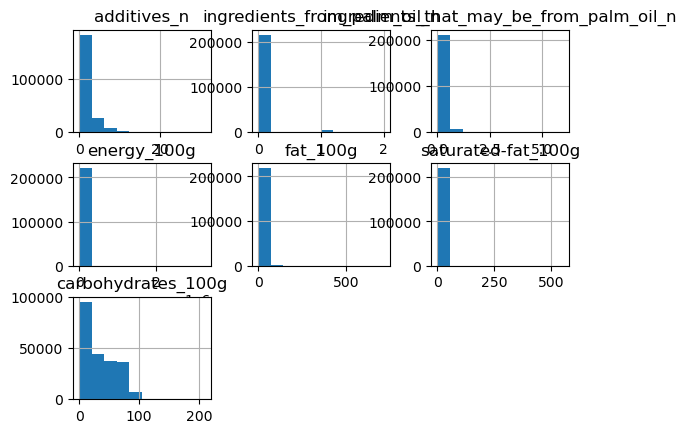

In [20]:
for col in columns_to_treat_by_median:
    if df_columns_keep[col].dtypes == 'float64':
        df_columns_keep[col] = df_columns_keep[col].fillna(df_columns_keep[col].median())
        print("Il y a désormais : " + str(df_columns_keep[col].isnull().sum()) + " valeurs manquantes pour " +col)
df_columns_keep[columns_to_treat_by_median].hist()

#### Methode 4 : IterativeImputer (facultatif)

Il y a désormais : 0 valeurs manquantes pour sugars_100g
Il y a désormais : 0 valeurs manquantes pour fiber_100g


array([[<Axes: title={'center': 'sugars_100g'}>,
        <Axes: title={'center': 'fiber_100g'}>]], dtype=object)

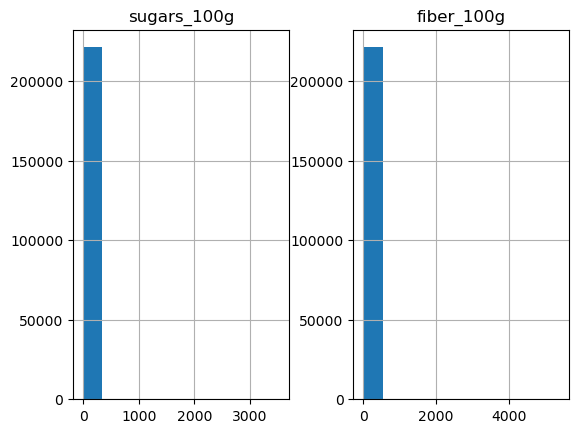

In [21]:
datas_to_treat_by_iterative_imputer = df_columns_keep[columns_to_treat_by_iterative_imputer]

# création d'un itérateur de remplissage
imputer = IterativeImputer(max_iter=10, random_state=0)

# remplissage des valeurs manquantes
datas_treated_by_iterative_imputer = pd.DataFrame(imputer.fit_transform(datas_to_treat_by_iterative_imputer), columns=columns_to_treat_by_iterative_inputer)

# remplacement des valeurs manquantes dans le dataset original
df_columns_keep[columns_to_treat_by_iterative_inputer] = datas_treated_by_iterative_imputer

for col in columns_to_treat_by_iterative_imputer:
    if df_columns_keep[col].dtypes == 'float64':
        df_columns_keep[col] = df_columns_keep[col].fillna(df_columns_keep[col].median())
        print("Il y a désormais : " + str(df_columns_keep[col].isnull().sum()) + " valeurs manquantes pour " +col)
df_columns_keep[columns_to_treat_by_iterative_imputer].hist()

## Doublons

In [ ]:
df_columns_keep = df_columns_keep.drop_duplicates(keep=False)
display(df_columns_keep.drop_duplicates(keep=False))
#print(len(df_columns_keep[col].dropna())-len(df_columns_keep[col].dropna().drop_duplicates()))
        
# Nous observons les doublons

### Traiter les doublons (en supprimant)

### Valeurs aberrantes
Faire une analyse exploratoire, regarder le jeu de données

In [ ]:
df_nutrition_full.head()

In [ ]:
#data.loc[(data['Age'] > 73), 'Age']
#data.loc[(data['Sexe'].isin(['M', 'F'])), 'Sexe']

In [ ]:
df_nutrition_full.describe()
# TODO : décrire le résultat (valeurs max, valeurs manquantes, ....)

In [ ]:
# Observons les valeurs aberrantes
# On observe la distribution de manière gnérale
# On s'attend à des valeurs entre 0 et 100
df_nutrition_full['fat_100g'].hist()

In [ ]:
#TODO:
# Observer les variables

df_nutrition_full_clean = df_nutrition_full[df_nutrition_full['fat_100g'] < 100]
df_nutrition_full_clean.shape #shape = renvoie la taille du df rows / cols
# Rien n'a été filtré car tout est déjà bon